<a href="https://colab.research.google.com/github/utheja2/Customer-Churn-Analysis/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("dataset.csv")

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [15]:
df.shape

(7043, 21)

In [16]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
Churn               0
dtype: int64


In [18]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [19]:
for x in df.index:
  if df.loc[x,"TotalCharges"]=="NA":
    df.loc[x, "TotalCharges"]=0

In [20]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

<ipython-input-20-59466351b608>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [21]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [22]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

<ipython-input-23-667708f03503>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


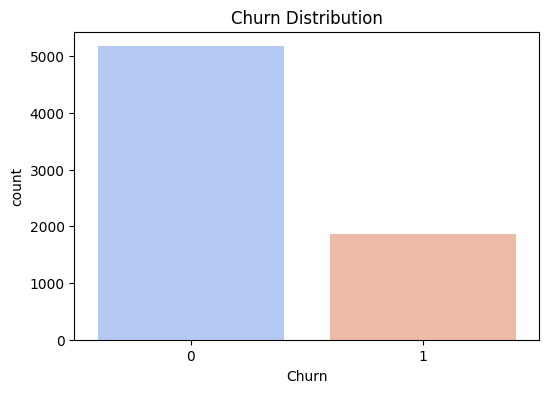

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()


In [25]:
from scipy.stats import ttest_ind

churned = df[df["Churn"] == 1]["MonthlyCharges"]
not_churned = df[df["Churn"] == 0]["MonthlyCharges"]

# Perform t-test
t_stat, p_val = ttest_ind(churned, not_churned)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: 16.536738015936308, P-Value: 2.7066456068884154e-60


In [26]:
import statsmodels.api as sm

# Select features
features = ["MonthlyCharges", "TotalCharges", "tenure"]
X = df[features]
y = df["Churn"]

# Add constant for intercept
X = sm.add_constant(X)

# Build Logistic Regression model
model = sm.Logit(y, X)
result = model.fit()

# Display summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.453698
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.2159
Time:                        21:31:59   Log-Likelihood:                -3195.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6547      0.116    -14.283      0.000      -1.882      -1.428
MonthlyCharges   